# Aufgabe 10:



as-22july06.graph
NetworKit.Graph(n=22963, m=48436)
Gesamtlaufzeit von ParK in ns:  5005700
	Laufzeiten der drei ParK Läufe in ns:
	 2005200
	 1999900
	 1000600
	Arithmetisches Mittel:  1668566.6666666667

Gesamtlaufzeit von Bucket-PQ in ns:  5005700
	Laufzeiten der drei Bucket-PQ Läufe in ns:
	 2005500
	 1000400
	 1001000
	Arithmetisches Mittel:  1335633.3333333333


belgium.osm.graph
NetworKit.Graph(n=1441295, m=1549970)
Gesamtlaufzeit von ParK in ns:  455536400
	Laufzeiten der drei ParK Läufe in ns:
	 158856900
	 159891100
	 136788400
	Arithmetisches Mittel:  151845466.66666666

Gesamtlaufzeit von Bucket-PQ in ns:  455536400
	Laufzeiten der drei Bucket-PQ Läufe in ns:
	 266159600
	 258214700
	 269448600
	Arithmetisches Mittel:  264607633.33333334


citationCiteseer.graph
NetworKit.Graph(n=268495, m=1156647)
Gesamtlaufzeit von ParK in ns:  185442200
	Laufzeiten der drei ParK Läufe in ns:
	 58614900
	 62161000
	 64666300
	Arithmetisches Mittel:  61814066.666666664

Gesamtlaufzeit vo

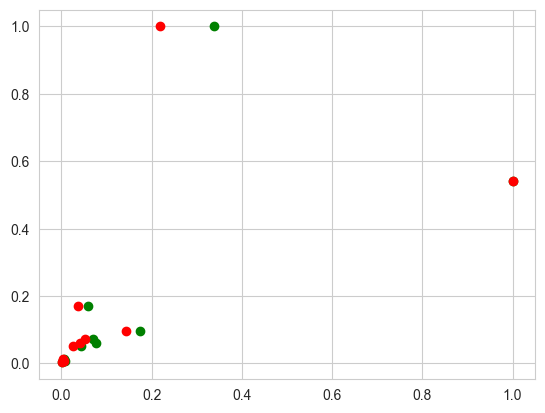

In [25]:
import os
import statistics
import time

import matplotlib.pyplot as plt
import networkit as nk
from networkit import centrality

files = list()

timeDivEdgeParKX = list()
timeDivEdgeParKY = list()
timeDivEdgeBucketX = list()
timeDivEdgeBucketY = list()

for file in os.listdir("./graphs"):
    if file.endswith(".graph"):
        T1_start = time.time()
        G: nk.Graph = nk.readGraph("./graphs/" + file, nk.Format.METIS)

        laeufe_ParK = list()
        laeufe_PQ = list()
        
        a: nk.centrality.CoreDecomposition = nk.centrality.CoreDecomposition(G)

        T2_start = time.time_ns()
        for i in range(3):
            T3_start = time.time_ns()
            a: nk.centrality.CoreDecomposition = a.run()
            T3_end = time.time_ns()
            laeufe_ParK.append(T3_end - T3_start)
        T2_end = time.time_ns()
        
        
        b: nk.centrality.CoreDecomposition = nk.centrality.CoreDecomposition(G, enforceBucketQueueAlgorithm=True)
        
        T4_start = time.time_ns()
        for i in range(3):
            T5_start = time.time_ns()
            b: nk.centrality.CoreDecomposition = b.run()
            T5_end = time.time_ns()
            laeufe_PQ.append(T5_end - T5_start)
        T4_end = time.time_ns()
        
        T1_end = time.time_ns()

        

        timeDivEdgeParKX.append(statistics.mean(laeufe_ParK))
        timeDivEdgeParKY.append(G.numberOfEdges())
        
        timeDivEdgeBucketX.append(statistics.mean(laeufe_PQ))
        timeDivEdgeBucketY.append(G.numberOfEdges())

        print()
        print()
        print(file)
        print(G)

        print("Gesamtlaufzeit von ParK in ns: ", T2_end - T2_start)
        print("\tLaufzeiten der drei ParK Läufe in ns:")
        for ts in laeufe_ParK:
            print("\t",ts)
        print("\tArithmetisches Mittel: ", statistics.mean(laeufe_ParK))
        print()
        print("Gesamtlaufzeit von Bucket-PQ in ns: ", T2_end - T2_start)
        print("\tLaufzeiten der drei Bucket-PQ Läufe in ns:")
        for ts in laeufe_PQ:
            print("\t",ts)
        print("\tArithmetisches Mittel: ", statistics.mean(laeufe_PQ))

plt.xlabel("Time Normalized")
plt.ylabel("Edges Normalized")

print(timeDivEdgeParKX)
print(timeDivEdgeParKY)

print(timeDivEdgeBucketX)
print(timeDivEdgeBucketY)

timeDivEdgeParKX = [float(i)/max(timeDivEdgeParKX) for i in timeDivEdgeParKX]
timeDivEdgeParKY = [float(i)/max(timeDivEdgeParKY) for i in timeDivEdgeParKY]

timeDivEdgeBucketX = [float(i)/max(timeDivEdgeBucketX) for i in timeDivEdgeBucketX]
timeDivEdgeBucketY = [float(i)/max(timeDivEdgeBucketY) for i in timeDivEdgeBucketY]

print(timeDivEdgeParKX)
print(timeDivEdgeParKY)

print(timeDivEdgeBucketX)
print(timeDivEdgeBucketY)



for x in range(len(timeDivEdgeParKX)):
    plt.scatter(timeDivEdgeParKX[x], timeDivEdgeParKY[x], c="g")
for x in range(len(timeDivEdgeBucketX)):
    plt.scatter(timeDivEdgeBucketX[x], timeDivEdgeBucketY[x], c="r")
